In [2]:
'''
- Hypothesis
- EDA - Charts (sns, Matplotlib, plotyly, Tableau)
- Pre-processings - (fixing errors, fixing Nulls, Outliers, ) VIF - groupy (Relashionship)
  - Feature Engineering (you do the feature engineering - LR)
  - Feature Learning
- Spilt train and test (Val) 
- Build your model
  - Define a model
  - Fit the model 
  - Perform prediction 
- Cross Validation
  - Decide your metrics 
- Look at the result -> Model - Change parameters 
- Searialize your model -> use it in real time predictions

SyntaxError: EOF while scanning triple-quoted string literal (518640910.py, line 15)

In [3]:
#Train 
#Test 
#Sample 
#Machine Learning - Machine Learn ----- on something ----- Use the same to derive something
#The data with which we train the model is called as train
#Data which has not been seen by the model - but actual Y - Predict on (Y)

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
from datetime import datetime
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

'''
#Assumptions 
1. Hypothesis 
  Loan Amount - Loan Approval 
  - Loan Amount can be high - High income - Applicant income
  - If dependents exsist high of loan status - Y 
  - Age is middleish may more chances of approval 
  - Credit history could most important
  - SelfEmployed can influence approval 
'''

## EDA

In [4]:
train = pd.read_csv("https://datahack-prod.s3.amazonaws.com/train_file/train_ctrUa4K.csv")
test = pd.read_csv("https://datahack-prod.s3.amazonaws.com/test_file/test_lAUu6dG.csv")
submission = pd.read_csv("https://datahack-prod.s3.amazonaws.com/sample_submission/sample_submission_49d68Cx.csv")

In [5]:
train.columns.difference(test.columns)

Index(['Loan_Status'], dtype='object')

In [6]:
print("Train shape:",train.shape)
print("Test shape:",test.shape)

Train shape: (614, 13)
Test shape: (367, 12)


In [7]:
data = pd.concat([train, test],axis = 0)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 107.3+ KB


In [9]:
data.loc[:,~data.columns.isin(['Loan_Status'])].isna().sum().sort_values(ascending = False)

Credit_History       79
Self_Employed        55
LoanAmount           27
Dependents           25
Gender               24
Loan_Amount_Term     20
Married               3
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
dtype: int64

In [11]:
def annot(splot):
    for p in splot.patches:
        splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),  ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


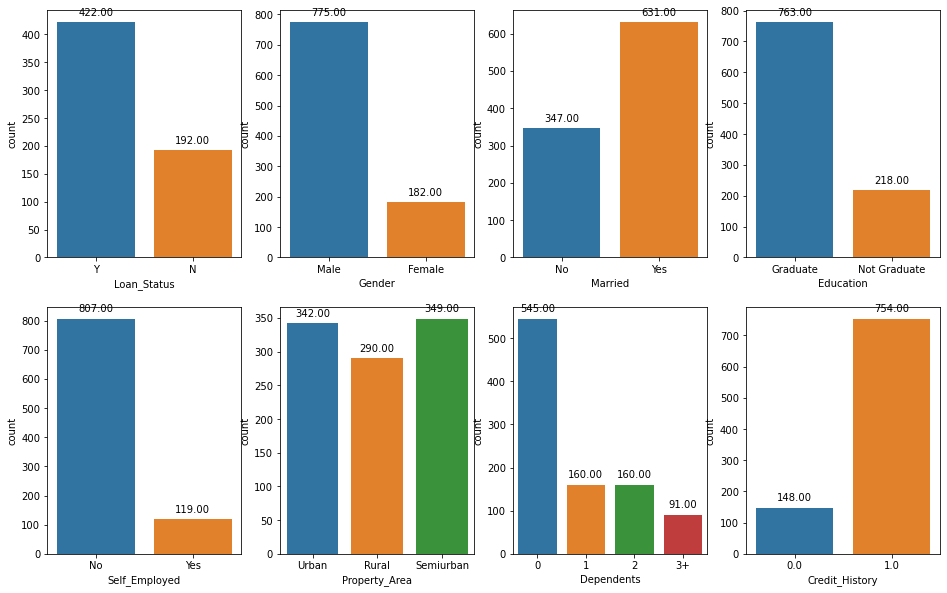

In [13]:
#Univariate Analysis and Bivariate Analysis 
fig,ax= plt.subplots(2,4,figsize=(16,10))
#cat_cols = data.select_dtypes(exclude = np.number).columns

splot = sns.countplot('Loan_Status',data=data,ax =ax[0][0])
annot(splot)
splot =sns.countplot('Gender',data=data,ax =ax[0][1])
annot(splot)
splot = sns.countplot('Married',data=data,ax =ax[0][2])
annot(splot)
splot = sns.countplot('Education',data=data,ax =ax[0][3])
annot(splot)
splot = sns.countplot('Self_Employed',data=data,ax =ax[1][0])
annot(splot)
splot = sns.countplot('Property_Area',data=data,ax =ax[1][1])
annot(splot)
splot = sns.countplot('Dependents',data=data,ax =ax[1][2])
annot(splot)
splot = sns.countplot('Credit_History',data=data,ax =ax[1][3])
annot(splot)


In [10]:
train.loc[:,~train.columns.isin(['Loan_Id'])].select_dtypes(exclude = np.number).columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

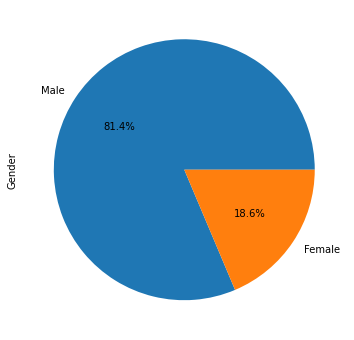

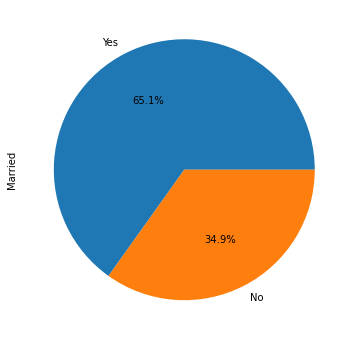

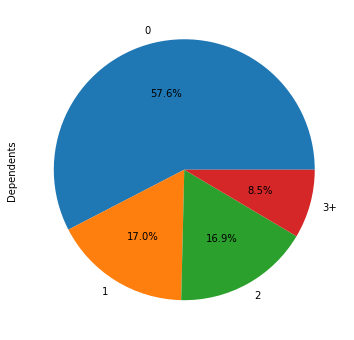

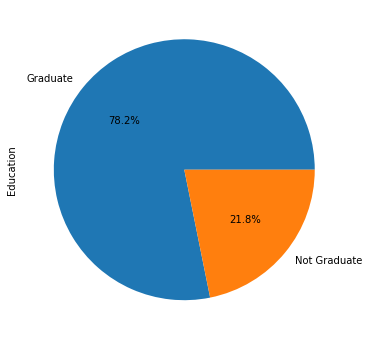

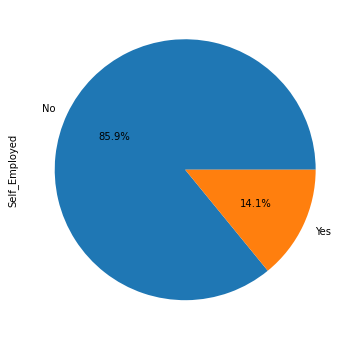

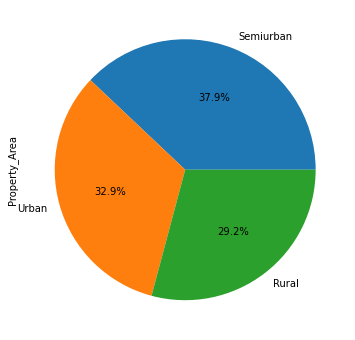

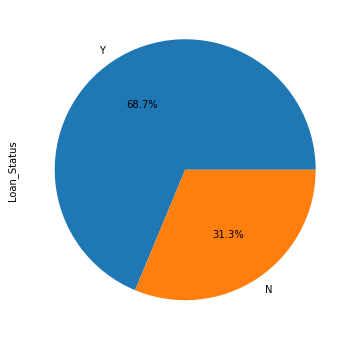

In [11]:
for i in train.loc[:,~train.columns.isin(['Loan_ID'])].select_dtypes(exclude = np.number).columns:
    train[i].value_counts().plot.pie(subplots = True , figsize = (11,6),autopct = '%1.1f%%')
    plt.show()

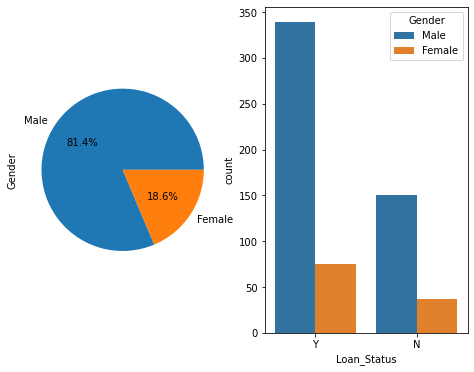

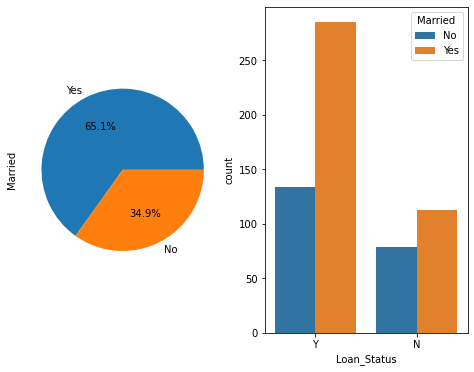

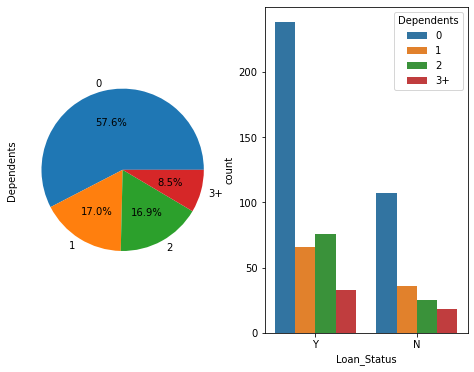

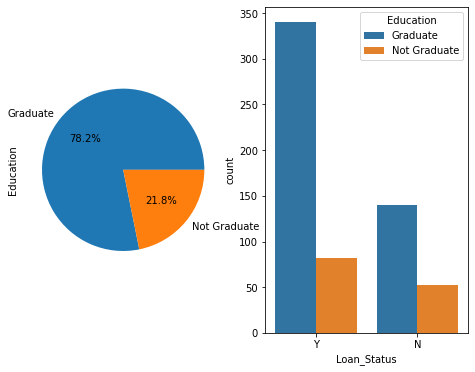

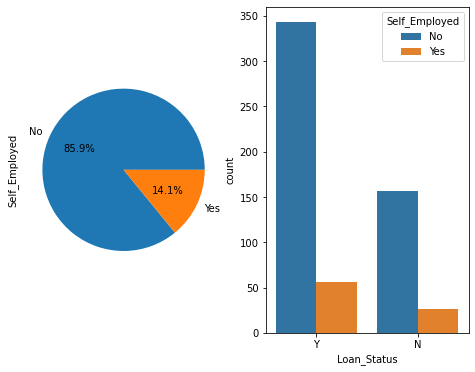

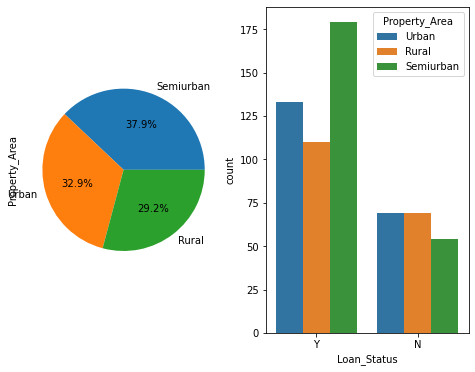

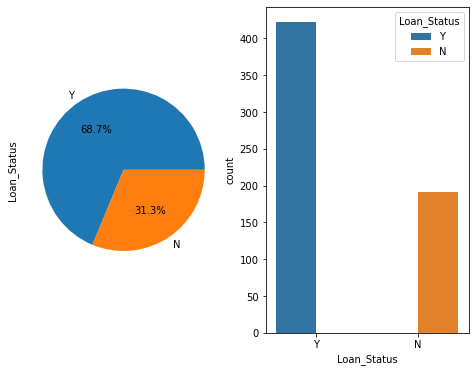

In [12]:
for i in train.loc[:,~train.columns.isin(['Loan_ID'])].select_dtypes(exclude = np.number).columns:
    f,ax = plt.subplots(1,2,figsize=(8,6))
    train[i].value_counts().plot.pie(ax = ax[0],subplots = True , figsize = (11,6),autopct = '%1.1f%%')
    sns.countplot('Loan_Status',hue = i, data = train,ax = ax[1])
    plt.show()

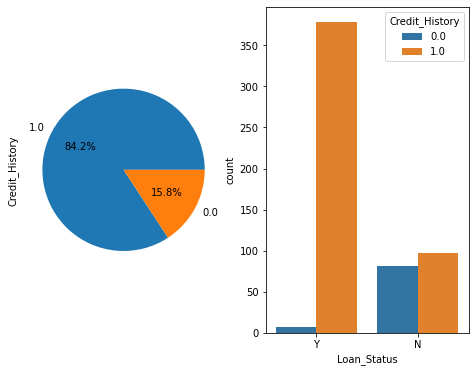

In [13]:
f,ax = plt.subplots(1,2,figsize=(8,6))
train['Credit_History'].value_counts().plot.pie(ax = ax[0],subplots = True , figsize = (11,6),autopct = '%1.1f%%')
sns.countplot('Loan_Status',hue = 'Credit_History', data = train,ax = ax[1])
plt.show()

In [14]:
data['Loan_Amount_Term'].value_counts()

360.0    823
180.0     66
480.0     23
300.0     20
240.0      8
84.0       7
120.0      4
60.0       3
36.0       3
12.0       2
350.0      1
6.0        1
Name: Loan_Amount_Term, dtype: int64

In [15]:
data['Credit_History'].value_counts()

1.0    754
0.0    148
Name: Credit_History, dtype: int64

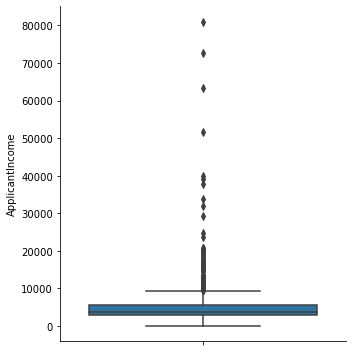

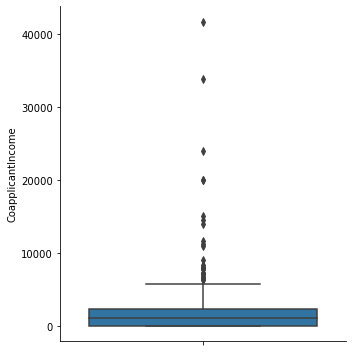

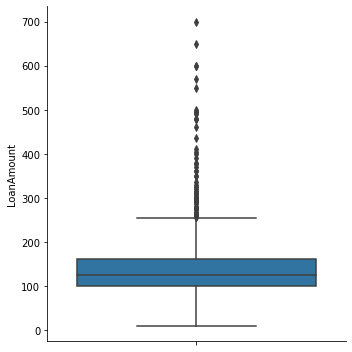

In [16]:
#fig,ax= plt.subplots(1,3,figsize=(16,10))
for ind,i in enumerate(data.loc[:,~data.columns.isin(['Loan_Amount_Term','Credit_History'])].select_dtypes(include = np.number).columns): 
    sns.catplot(y = i, data = data,kind = 'box')

- Credit_History       79
- Self_Employed        55
- LoanAmount           27
- Dependents           25
- Gender               24
- Loan_Amount_Term     20
- Married               3

In [17]:
data['Married'].value_counts().index[0]

'Yes'

In [18]:
#Married 
data['Married'].fillna(data['Married'].value_counts().index[0],inplace = True)

In [19]:
#Dependents
data['Dependents'] = data.groupby('Married').Dependents.transform(lambda x:x.fillna(x.mode()[0]))

In [20]:
data['Credit_History'].value_counts()

1.0    754
0.0    148
Name: Credit_History, dtype: int64

In [21]:
#Credit History Train
data.loc[(data['Loan_Status'].isna()==False) & (data['Credit_History'].isna()==True) & (data['Loan_Status']=='Y'),'Credit_History']=1.0
data.loc[(data['Loan_Status'].isna()==False) & (data['Credit_History'].isna()==True) & (data['Loan_Status']=='N'),'Credit_History']=0.0

In [22]:
data.isna().sum()

Loan_ID                0
Gender                24
Married                0
Dependents             0
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        29
Property_Area          0
Loan_Status          367
dtype: int64

In [23]:
#credit History Test
data['Credit_History'].fillna(data['Credit_History'].value_counts().index[0],inplace = True)

In [24]:
#Gender 
data['Gender'].fillna(data['Gender'].value_counts().index[0],inplace = True)

In [25]:
#Self Employed
data['Self_Employed'].fillna(data['Self_Employed'].value_counts().index[0],inplace = True)

In [26]:
#loan Amount Term
data.groupby(['Gender','Married','Education','Dependents'])['Loan_Amount_Term'].median()

Gender  Married  Education     Dependents
Female  No       Graduate      0             360.0
                               1             360.0
                               2             360.0
                               3+            360.0
                 Not Graduate  0             360.0
                               1             360.0
                               3+            270.0
        Yes      Graduate      0             360.0
                               1             360.0
                               2             360.0
                               3+            360.0
                 Not Graduate  0             360.0
                               1             420.0
                               2             360.0
                               3+            360.0
Male    No       Graduate      0             360.0
                               1             360.0
                               2             360.0
                               3+       

In [27]:
data['Loan_Amount_Term'] = data.groupby(['Gender','Married','Education','Dependents']).Loan_Amount_Term.transform(lambda x:x.fillna(x.median()))

In [28]:
data.isna().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status          367
dtype: int64

In [29]:
data['LoanAmount'] = data.groupby(['Property_Area','Gender','Married','Education','Self_Employed','Dependents']).LoanAmount.transform(lambda x:x.fillna(x.median()))

In [30]:
#fixing Inconsistency 
data['Dependents'] = data['Dependents'].map({'0':0,'1':1,'2':2,"3+":3})
data['Property_Area'] = data['Property_Area'].map({'Rural':0,'Semiurban':1,'Urban':2})

In [31]:
#Feature Engineering! 
data['Total_Income'] = data['ApplicantIncome']+data['CoapplicantIncome']
data.drop(['ApplicantIncome','CoapplicantIncome'],axis = 1,inplace = True)

In [32]:
#Feature Engineering! 
data['LoanAmount'] = data['LoanAmount']*1000
#rate= 10, r = ((10/12)/100) = 0.00833
r = 0.00833
data['EMI'] =data.apply(lambda x: (x['LoanAmount']*r*((1+r)**x['Loan_Amount_Term']))/((1+r)**((x['Loan_Amount_Term'])-1)),axis = 1)

In [33]:
#Feature Engineering
data['EMI_per_Loan_Amount_Term'] = data['EMI']/data['Loan_Amount_Term']
data['EMI_per_LoanAmount'] = data['EMI']/data['LoanAmount']

In [34]:
data.drop(['Loan_ID','EMI'],axis = 1,inplace = True)

In [35]:
#data.drop(['Total_Income'],axis = 1,inplace = True)

In [36]:
data['Loan_Status'] = data['Loan_Status'] .map({'N':0,'Y':1})

In [37]:
data_ = pd.get_dummies(data,drop_first = True)

In [38]:
data_.shape

(981, 13)

In [39]:
data_.head()

,Dependents,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,EMI_per_Loan_Amount_Term,EMI_per_LoanAmount,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes
0,0,114500.0,360.0,1.0,2,1.0,5849.0,2.671472,0.008399,1,0,0,0
1,1,128000.0,360.0,1.0,0,0.0,6091.0,2.986449,0.008399,1,1,0,0
2,0,66000.0,360.0,1.0,2,1.0,3000.0,1.539888,0.008399,1,1,0,1
3,0,120000.0,360.0,1.0,2,1.0,4941.0,2.799796,0.008399,1,1,1,0
4,0,141000.0,360.0,1.0,2,1.0,6000.0,3.289761,0.008399,1,0,0,0


In [40]:
data_.isna().sum()

Dependents                    0
LoanAmount                    0
Loan_Amount_Term              0
Credit_History                0
Property_Area                 0
Loan_Status                 367
Total_Income                  0
EMI_per_Loan_Amount_Term      0
EMI_per_LoanAmount            0
Gender_Male                   0
Married_Yes                   0
Education_Not Graduate        0
Self_Employed_Yes             0
dtype: int64

In [41]:
train_df = data_.loc[data_['Loan_Status'].isna()==False]
test_df = data_.loc[data_['Loan_Status'].isna()==True]


X_main_test = test_df.drop(['Loan_Status'],axis = 1)

In [42]:
X = train_df.drop(['Loan_Status'],axis = 1)
y = train_df['Loan_Status']

In [43]:
from sklearn.model_selection import train_test_split,cross_validate
train_x, val_x, train_y, val_y = train_test_split(X,y,test_size = 0.2,random_state=2)

In [44]:
test_df.shape

(367, 13)

In [45]:
#feature Scaling 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_x = sc.fit_transform(train_x)
val_x = sc.transform(val_x)
X_main_test_sc = sc.transform(X_main_test)

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#train_model 
clf_0 = LogisticRegression().fit(train_x,train_y)

In [47]:
pred_y_0 = clf_0.predict(val_x)
accuracy_score(pred_y_0,val_y)

0.8048780487804879

<AxesSubplot:>

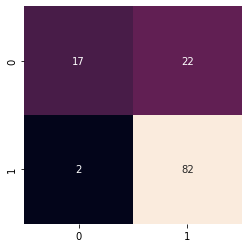

In [48]:
from sklearn.metrics import accuracy_score,confusion_matrix
cm = confusion_matrix(val_y,pred_y_0)

sns.heatmap(cm,square = True,annot = True,cbar= False)

In [49]:
pred_test = clf_0.predict(X_main_test_sc)

predictions_test_final = ['Y' if y>0.5 else 'N' for y in pred_test]

submission['Loan_Status'] = predictions_test_final
submission.to_csv("./submission_LR.csv",index = False)

In [50]:
from sklearn.neighbors import KNeighborsClassifier
#train_model 
KNN = KNeighborsClassifier().fit(train_x,train_y)

pred_y_0 = KNN.predict(val_x)
accuracy_score(pred_y_0,val_y)

0.8048780487804879

In [52]:
pred_test = KNN.predict(X_main_test_sc)

predictions_test_final = ['Y' if y>0.5 else 'N' for y in pred_test]

submission['Loan_Status'] = predictions_test_final
submission.to_csv("./submission_KNN.csv",index = False)